In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy
import cv2

In [297]:
inputImage = cv2.imread('./panamericana1.PNG')
objectiveImage = cv2.imread('./panamericana2.PNG')

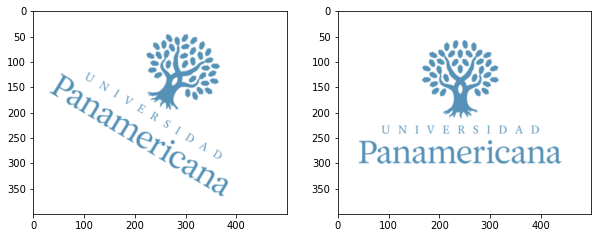

In [298]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(inputImage)
plt.subplot(1,2,2)
plt.imshow(objectiveImage)

In [299]:
def objectiveFunction(img1):
    return np.sum((objectiveImage - img1) ** 2)

In [300]:
# Rotate Test
(h, w) = inputImage.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), 32, 1.0)
rotated = cv2.warpAffine(inputImage, M, (w, h), borderValue=(255,255,255))
cv2.imshow("Rotated by 45 Degrees", rotated)

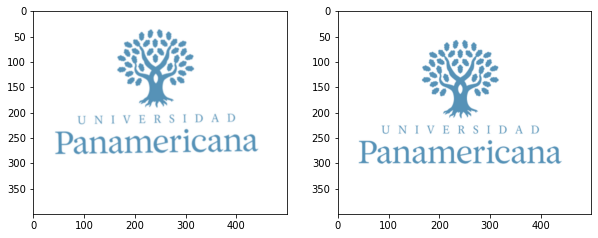

In [301]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rotated)
plt.subplot(1,2,2)
plt.imshow(objectiveImage)

### Genetic Algorithm Aux Functions

In [302]:
imageWidth = inputImage.shape[0]
imageHeight = inputImage.shape[1]

In [303]:
class Chromosome:
    #dX = dy = dt = da = sX = sY = st = sa = 0

    def __init__(self, dX, dy, dt, da, sX, sY, st, sa):
        self.dX, self.dY, self.dt, self.da, self.sX, self.sY, self.st, self.sa = dX, dy, dt, da, sX, sY, st, sa

    def getElements(self):
        return np.array([self.dX, self.dY, self.dt, self.da, self.sX, self.sY, self.st, self.sa])


In [304]:
def ChromosomeToImage(chrom):
    M = cv2.getRotationMatrix2D((chrom[0], chrom[1]), chrom[2], chrom[3])
    image = cv2.warpAffine(inputImage, M, (imageHeight, imageWidth), borderValue=(255,255,255))
    return image

In [396]:
def GetRandomChromosome():
    dX = imageWidth/2 #np.random.uniform(-imageWidth/2, imageWidth/2)
    dY = imageHeight/2 #np.random.uniform(-imageHeight/2, imageHeight/2)
    dt = np.random.uniform(-180, 180)
    da = 1 #np.random.uniform(0.5, 1.5)
    sX = abs(np.random.normal(0, imageWidth/10))
    sY = abs(np.random.normal(0, imageHeight/10))
    st = abs(np.random.normal(0, 30))
    sa = abs(np.random.normal(0, 0.1))

    data = np.array([dX, dY,dt, da, sX, sY, st, sa])
    score = objectiveFunction(ChromosomeToImage(data))
    return [data, score]

In [397]:
def GetPopulation(size = 0):
    return [GetRandomChromosome() for _ in range(size)]

In [354]:
def Crossover(A, B):
    C = (A[0] + B[0]) / 2.0
    return [C, -1]

In [355]:
def Mutation(chrom):
    T = 1 / (4**(1/2))

    for i in range(4):
        chrom[0][i] += np.random.normal(0, chrom[0][i+4])
        chrom[0][i+4] *= (np.e ** np.random.normal(0, T))
    
    chrom[1] = objectiveFunction(ChromosomeToImage(chrom[0]))

In [398]:
def SurvivorChromosomes(fatherGeneration, childGeneration, popSize):
    pop = np.concatenate((fatherGeneration, childGeneration), axis=0)
    return pop[pop[:, 1].argsort()][::-1][ : popSize]#pop[np.argsort(pop, axis=1)]#


In [427]:
fatherGeneration, childGeneration = GetPopulation(5), GetPopulation(3)
survivorPop= SurvivorChromosomes(fatherGeneration, childGeneration, 3)

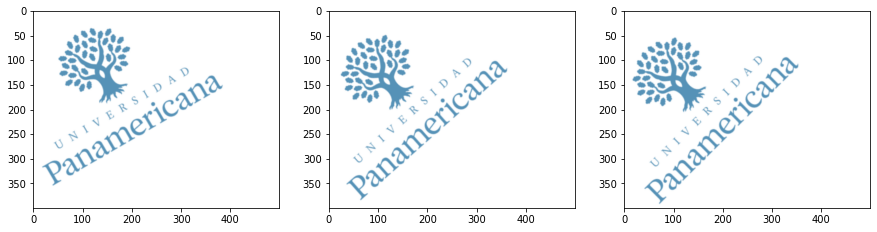

In [428]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(ChromosomeToImage(survivorPop[0][0]))
plt.subplot(1,3,2)
plt.imshow(ChromosomeToImage(survivorPop[1][0]))
plt.subplot(1,3,3)
plt.imshow(ChromosomeToImage(survivorPop[2][0]))